## Лаб.06 PCA

### Уменьшение размерности методом главных компонент

---

#### Входные данные:
датасет в формате `weight-height.csv`, содержащий данные роста, веса и пола для 10000 чел.

#### Задание:
Написать программный код для вычисления главных компонент для исходных данных. Вывести проекции данных на главную компоненту вместе с исходными точками.

**Порядок выполнения работы:**
1. Сгенерируйте датасет в виде облака из 300 точек. Воспользуйтесь кодом для генерации координат в виде нормального распределения c матрицей ковариации `[1.0, -1.0]`, `[-2.0, 3.0]` и значениями матожидания равными нулю. Воспользуйтесь функцией `numpy.random.multivariate_normal(mean, cov, size)`
2. Выведите на диаграмме облако точек для контроля.
3. Обучите на полученном массиве данных метод главных компонент: `sklearn.decomposition.PCA`, используя параметры по умолчанию. Выведите долю дисперсии, объясняемую каждой из компонент, а также их направления в виде массива коэффициентов.
4. Обучите еще раз метод, но с указанием числа компонент, равного 1. Преобразуйте данные к новым компонентам при помощи функции `fit_transform()` и постройте проекцию данных на компоненты с помощью функции `inverse_transform()`. Получится новый двумерный массив координат.
5. Выведите на диаграмме исходное облако точек и новый набор данных (другим цветом).
6. Повторите описанные выше действия для исходных данных датасета `weight-height.csv`. Разделите данные в соответствии с признаком «Gender» и осуществите расчеты отдельно для каждого значения в координатах «Height» и «Weight».

---

1. Сгенерируйте датасет в виде облака из 300 точек. Воспользуйтесь кодом для генерации координат в виде нормального распределения c матрицей ковариации `[1.0, -1.0]`, `[-2.0, 3.0]` и значениями матожидания равными нулю. Воспользуйтесь функцией `numpy.random.multivariate_normal(mean, cov, size)`<br><br><i><b>What is Principal Component Analysis (PCA)?<br>It is by far the most popular dimensionality reduction algorithm (how to represent the same data using less features).</i></b>

In [ ]:
# подключим библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# generate a dataset in the form of a cloud of 300 points. use code to generate coordinates as normal
# distribution with a covariance matrix of [1.0, -1.0], [-2.0, 3.0] and expectation values of zero

mean = [0, 0]
cov = [[1.0, -1.0], [-2.0, 3.0]]
x, y = np.random.multivariate_normal(mean, cov, 300).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


---

2. Выведите на диаграмме облако точек для контроля.

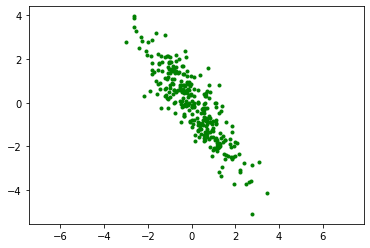

In [ ]:
# plot the resulting cloud of points

plt.plot(x, y, '.', color='green')
plt.axis('equal')
plt.show()

---

3. Обучите на полученном массиве данных метод главных компонент: `sklearn.decomposition.PCA`, используя параметры по умолчанию. Выведите долю дисперсии, объясняемую каждой из компонент, а также их направления в виде массива коэффициентов.<br><br><i><b>Note:<br>Instead of arbitrarily specifying the number of principal components we want to preserve, we can set `n_components` to be a float between 0.0 and 1.0, indicating the ratio of variance we wish to preserve: `pca = PCA(n_components=0.95)`, this is according to the documentation</i></b>

In [ ]:
# train the PCA: sklearn.decomposition.PCA on the received data set, using the default parameters, then output the
# proportion of variance explained by each of the components, as well as their directions, as an array of coefficients


# without n_components PCA(n_components), the algorithm will detect the quantity of features of the dataset
pca = PCA()
pca.fit(np.array([x, y]).T)
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')
x1 = pca.transform(np.array([x, y]).T)
x2 = pca.inverse_transform(x1)

# this output tells us that 93% of the dataset’s variance lies along the first component, and about 7% lies along the second component

Explained variance ratio: [0.93863366 0.06136634]

Components directions:
 [[ 0.57924461 -0.81515378]
 [-0.81515378 -0.57924461]]

Covariance matrix:
 [[ 1.32780073 -1.54621284]
 [-1.54621284  2.40500834]]


---

4. Обучите еще раз метод, но с указанием числа компонент, равного 1. Преобразуйте данные к новым компонентам при помощи функции `fit_transform()` и постройте проекцию данных на компоненты с помощью функции `inverse_transform()`. Получится новый двумерный массив координат.

In [ ]:
# train the method again, but specifying the number of components equal to 1. transform the data to new components using 
# the fit_transform() function and build a data projection on the components using the inverse_transform() function

pca = PCA(n_components=1)
pca.fit(np.array([x, y]).T)
print(f'Explained variance: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')

x1 = pca.transform(np.array([x, y]).T)
x2 = pca.inverse_transform(x1)

Explained variance: [0.93863366]

Components directions:
 [[ 0.57924461 -0.81515378]]

Covariance matrix:
 [[ 1.32780073 -1.54621284]
 [-1.54621284  2.40500834]]


---

5. Выведите на диаграмме исходное облако точек и новый набор данных (другим цветом).

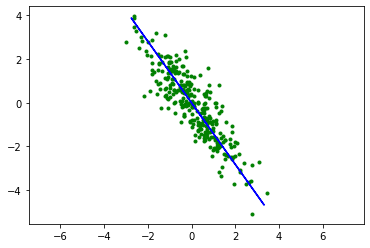

In [ ]:
# plot the original point cloud and the new dataset (in a different color) on the chart

plt.plot(x, y, '.', color='green')
plt.plot(x2[:, 0], x2[:, 1], color='blue')
plt.axis('equal')
plt.show()

---

6. Повторите описанные выше действия для исходных данных датасета `weight-height.csv`. Разделите данные в соответствии с признаком «Gender» и осуществите расчеты отдельно для каждого значения в координатах «Height» и «Weight».

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# repeat the above steps for the source data of the weight-height.csv dataset

# use this line if on Jupyter
# df = pd.read_csv('weight-height.csv')

# use this line if on Colab
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# divide the data according to the «Gender» attribute

df_male = df[df.Gender == 'Male'].drop('Gender', axis=1)
df_female = df[df.Gender == 'Female'].reset_index(drop=True).drop('Gender', axis=1)

In [ ]:
df_male.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [ ]:
df_female.head()

,Height,Weight
0,58.910732,102.088326
1,65.230013,141.305823
2,63.369004,131.041403
3,64.479997,128.171511
4,61.793096,129.781407


In [ ]:
# only male dataframe

pca = PCA()
pca.fit(df_male)
print(f'Explained variance: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')

Explained variance: [0.99484203 0.00515797]

Components directions:
 [[ 0.1246006   0.99220698]
 [-0.99220698  0.1246006 ]]

Covariance matrix:
 [[  8.19884325  48.87964899]
 [ 48.87964899 391.29407402]]


In [ ]:
# only female dataframe

pca = PCA()
pca.fit(df_female)
print(f'Explained variance: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')

Explained variance: [0.99460024 0.00539976]

Components directions:
 [[-0.12021413 -0.99274799]
 [ 0.99274799 -0.12021413]]

Covariance matrix:
 [[  7.26994749  43.57640416]
 [ 43.57640416 361.8542814 ]]


In [ ]:
pca = PCA(n_components=1)
pca.fit(df_male)
print(f'Explained variance: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')

x1 = pca.transform(df_male)
x2 = pca.inverse_transform(x1)

Explained variance: [0.99484203]

Components directions:
 [[0.1246006  0.99220698]]

Covariance matrix:
 [[  8.19884325  48.87964899]
 [ 48.87964899 391.29407402]]


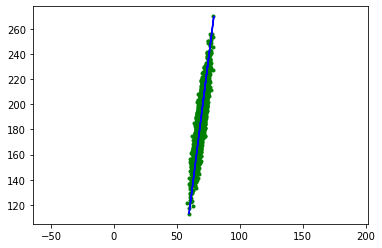

In [ ]:
plt.plot(df_male['Height'], df_male['Weight'], '.', color='green')
plt.plot(x2[:, 0], x2[:, 1], color='blue')
plt.axis('equal')
plt.show()

In [ ]:
pca = PCA(n_components=1)
pca.fit(df_female)
print(f'Explained variance: {pca.explained_variance_ratio_}')
print(f'\nComponents directions:\n {pca.components_}')
print(f'\nCovariance matrix:\n {pca.get_covariance()}')

x1 = pca.transform(df_female)
x2 = pca.inverse_transform(x1)

Explained variance: [0.99460024]

Components directions:
 [[-0.12021413 -0.99274799]]

Covariance matrix:
 [[  7.26994749  43.57640416]
 [ 43.57640416 361.8542814 ]]


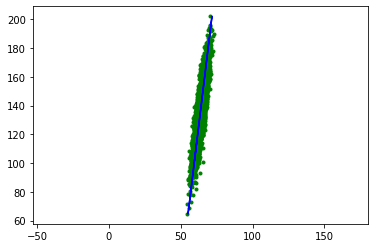

In [ ]:
plt.plot(df_female['Height'], df_female['Weight'], '.', color='green')
plt.plot(x2[:, 0], x2[:, 1], color='blue')
plt.axis('equal')
plt.show()